# Laboratorio 2 - Parte Calificada - Arquitectura de Computadoras 23-1

Alumno: Estéfano Machado Ferrer (20181753)

Fecha: 30-03-2023

Curso y Horario: Arquitectura de Computadoras (1IEE14) - Horario de Laboratorio 0621

## Enunciado 
Se solicita implementar la siguiente aproximación:

$$
\frac{\pi}{4}=1-\frac{1}{3}+\frac{1}{5}-\frac{1}{7}+\frac{1}{9}+\cdots
$$

1. Implementar una función en Python que devuelva el valor de la serie. La función debe estar basada en un bucle for. Solo debe tener
como parámetro la cantidad de elementos. Presente su resultado para 4000 elementos. 

2. Implementar una función en Python que devuelva el valor de la serie. La función debe estar basada en un bucle while. Solo debe tener
como parámetros un valor de referencia y la precisión. Puede usar el valor de pi proporcionado por el módulo math para tener una
referencia. Presente su resultado para una precisión de 1e-4. 

3. Implementar una función en Python que devuelva el valor de la serie. La función debe estar basada en un bucle while. Solo debe tener
como parámetro la precisión. Presente su resultado para una precisión de 1e-5.

4. Repetir los ítems 1, 2 y 3 en C. Justifique los tipos de datos de sus argumentos y del tipo de retorno de la función en sus comentarios.
Adicionalmente, su función principal debe mostrar los resultados de todas sus funciones en la consola. 

5. Haga una función que imprima los últimos cinco elementos de las series parciales en C, y compárelos con los últimos cinco elementos
de las series parciales de Python hasta los primeros 5 decimales.

La presentación del laboratorio debe ser en un cuaderno de jupyter. Puede emplear Colab, Jupyter Notebook desde servidor, o la extensión de
VSCode.

Para referencia, veamos el valor con decimales de $\pi/4$:

In [1]:
import math
value=math.pi/4
print(f"El valor de pi/4 es {value}")

El valor de pi/4 es 0.7853981633974483


También notemos que podemos escribir la suma en notación sigma de la siguiente manera:

$$
\sum_{k=0}^{\infty}\frac{(-1)^k}{2k+1}
$$

## Parte 1


In [35]:
def pi_approx_for(num_terms):
    sum=0 #variable donde acumularemos la suma
    terms=[] #lista donde acumularemos los términos de la suma
    for i in range(num_terms):
        sum += math.pow(-1,i)/(2*i+1)
        terms.append(sum) #añadimos a la lista el término actual
    return sum,terms

In [36]:
sum_for,terms=pi_approx_for(4000)
print(f"El valor acumulado para 4000 términos de la suma es de: {sum_for}")

El valor acumulado para 4000 términos de la suma es de: 0.7853356633984261


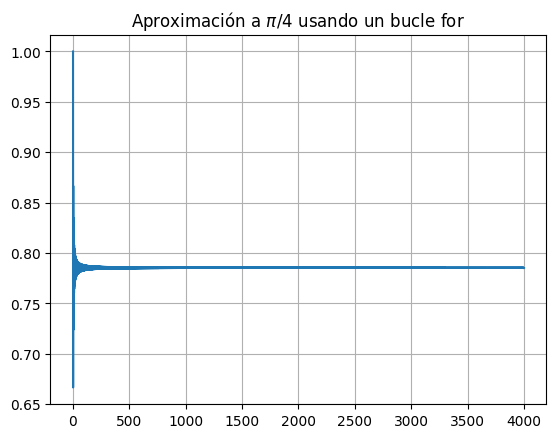

In [38]:
#Ploteamos los valores de la serie:
import matplotlib.pyplot as plt
plt.plot((range(1,4001)),terms)
plt.title("Aproximación a $\pi/4$ usando un bucle for")
plt.grid(True)

## Parte 2

In [49]:
#import time #usada para debuggear

def pi_approx_while_1(ref_value,precision):
    i=0 #Contador de iteración
    sum=0 #variable donde acumularemos la suma
    term_list=[]
    while True:
        term = math.pow(-1,i)/(2*i+1) #Término actual
        sum += term #acumulamos el término actual
        #time.sleep(0.5)
        #print(sum) #Comandos usados para debuggear
        if (abs(sum-ref_value) < precision):
            break
        i += 1
        term_list.append(sum)
    return sum,term_list

In [50]:
sum_while_1,term_list_while1=pi_approx_while_1(math.pi/4,1e-4)
print(f"El valor acumulado de la suma para una precisión de 10^(-4) es de: {sum_while_1}")

El valor acumulado de la suma para una precisión de 10^(-4) es de: 0.7852981634014484


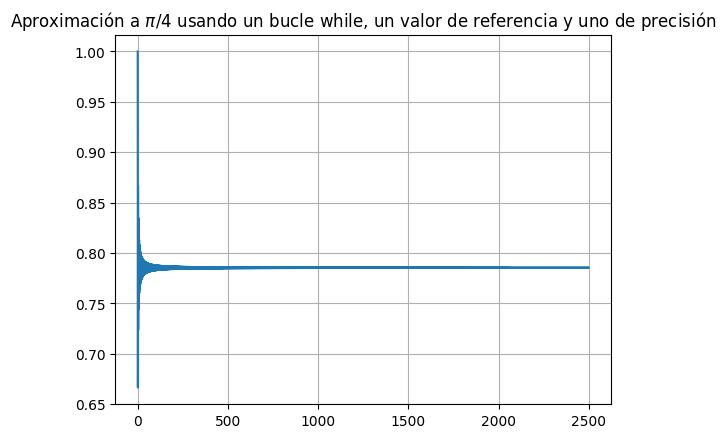

In [52]:
#Ploteamos los valores de la serie:
import matplotlib.pyplot as plt
plt.plot((range(1,len(term_list_while1)+1)),term_list_while1)
plt.title("Aproximación a $\pi/4$ usando un bucle while, un valor de referencia y uno de precisión")
plt.grid(True)

## Parte 3

Usaremos un approach en el cual tomemos el término anterior y lo comparemos con el término actual, para luego normalizar con respecto al término actual y así obtener un error relativo, el cual al llegar a ser menor a la precisión deseada va a indicarnos cuándo detener la iteración. La fórmula para dicho error relativo es:

$$
\epsilon=\frac{|\hat{S}_{n}-\hat{S}_{n-1}|}{\hat{S}_{n-1}}
$$

Donde $\hat{S}_{n}$ es la suma truncada al término enésimo, y por ende, $\hat{S}_{n-1}$ es la suma truncada al término anterior.

In [61]:
def pi_approx_while_2(precision):
    i=0 #Contador de iteración
    s_n=0 #variable donde acumularemos la suma
    eps=1 #Inicialización de la variable de error, con el caso para n=1
    s_n_ant=0 #variable donde guardaremos el resultado anterior
    term_list=[]
    while True:
        term = math.pow(-1,i)/(2*i+1) #Término actual
        s_n += term #acumulamos el término actual
        if (i>0):
            #A partir de la segunda iteración
            eps=abs(s_n-s_n_ant)/s_n_ant
        if(eps<precision):
            break
        s_n_ant=s_n
        i+=1
        term_list.append(s_n)
    return s_n,term_list

In [62]:
sum_while_2,term_list_while2=pi_approx_while_2(1e-5)
print(f"El valor acumulado de la suma para una precisión de 10^(-5) es de: {sum_while_2}")

El valor acumulado de la suma para una precisión de 10^(-5) es de: 0.7854020903251704


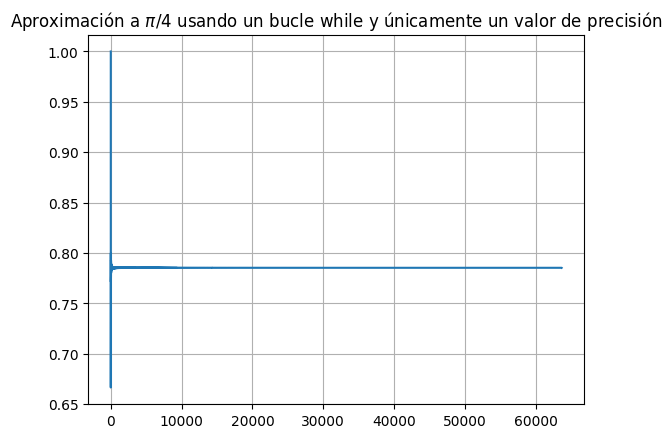

In [63]:
#Ploteamos los valores de la serie:
import matplotlib.pyplot as plt
plt.plot((range(1,len(term_list_while2)+1)),term_list_while2)
plt.title("Aproximación a $\pi/4$ usando un bucle while y únicamente un valor de precisión")
plt.grid(True)

## Partes 4 y 5

In [81]:
%%file approx_pi_1.c

#include <stdio.h>
#include <stdlib.h>
#include <math.h>

double pi_approx_for(int num_terms, double* terms){
    //El puntero nos permitirá usar memoria dinámica para guardar los términos de la suma parcial
    double sum=0; //variable donde acumularemos la suma
    for(int i=0; i<num_terms; i++){
        sum += pow(-1.0,(double)(i))/(2*(double)(i)+1);
        terms[i]=sum; //guardamos en memoria dinámica la suma parcial actual
    }
    return sum;
}

double pi_approx_while1(double ref_value, double precision,  double* terms){
    //El puntero nos permitirá usar memoria dinámica para guardar los términos de la suma parcial
    int i=0; //Contador de iteración
    double sum=0; //variable donde acumularemos la suma
    double term;
    while(1){
        term=pow(-1.0,(double)(i))/(2*(double)(i)+1); //Término actual
        sum += term; //acumulamos el término actual
        if(fabs(sum-ref_value)<precision){
            break;
        }
        i++;
        terms[i]=sum; //guardamos en memoria dinámica la suma parcial actual
    }
    return sum;
}

double pi_approx_while2(double precision,  double* terms){
    //El puntero nos permitirá usar memoria dinámica para guardar los términos de la suma parcial
    int i=0; //Contador de iteración
    double s_n=0; //variable donde acumularemos la suma
    double eps=1; //Inicialización de la variable de error, con el caso para n=1
    double s_n_ant=0; //variable donde guardaremos el resultado anterior
    double term;
    //printf("1\n"); //for debugging
    while(1){
        term=pow(-1.0,(double)(i))/(2*(double)(i)+1); //Término actual
        s_n += term; //acumulamos el término actual
        if(i>0){
            //A partir de la segunda iteración
            eps=fabs(s_n-s_n_ant)/s_n_ant;
        }
        if(eps<precision){
            break;
        }
        s_n_ant=s_n;
        i++;
        terms[i]=s_n; //guardamos en memoria dinámica la suma parcial actual
    }
    //printf("2\n"); //for debugging
    return s_n;
}

void print_terms(int N, double* terms){
    printf("Los últimos 5 términos de la serie son: \n");
    printf("%lf\t%lf\t%lf\t%lf\t%lf\n", terms[N-4], terms[N-4], terms[N-3], terms[N-2], terms[N-1]);
}

int main(){
    int num_terms=4000; //cantidad de términos para la función con for
    double precision_1=1e-4; //precisión para la primera función con while
    double precision_2=1e-5; //precisión para la segunda función con while
    double ref_value=M_PI_4; //Usamos el valor de pi/4 de math.h

    double* for_terms = (double*)malloc(sizeof(double)*num_terms); //Definimos los punteros y direcciones de memoria dinámica
    double* while1_terms = (double*)malloc(sizeof(double)*3000); //Definimos los punteros y direcciones de memoria dinámica
     double* while2_terms = (double*)malloc(sizeof(double)*70000); //Definimos los punteros y direcciones de memoria dinámica
    //para guardar los términos de las sumas parciales

    printf("El valor de referencia de pi/4 es %lf\n",ref_value);
    printf("s_for:%lf\n", pi_approx_for(num_terms, for_terms));
    print_terms(num_terms, for_terms);
    printf("s_while_1:%lf\n", pi_approx_while1(ref_value,precision_1,while1_terms));
    printf("s_while_2:%lf\n", pi_approx_while2(precision_2,while2_terms));
    return 0;
}

Overwriting approx_pi_1.c


In [82]:
! gcc approx_pi_1.c -o approx_pi_1 -lm

In [83]:
! ./approx_pi_1

El valor de referencia de pi/4 es 0.785398
s_for:0.785336
Los últimos 5 términos de la serie son: 
0.785461	0.785461	0.785336	0.785461	0.785336
s_while_1:0.785298
s_while_2:0.785402


Solo quiero justificar que utilicé los números de términos para reservar posiciones de memoria dinámica 3000 y 70000 respectivamente para las funciones approx_while_1 y approx_while_2 basado en los plots obtenidos arriba (en su límite superior).